In [1]:
import pandas as pd
import numpy as np
from collections import Counter

df = pd.read_csv('amazon_reviews_us_Mobile_Electronics_v1_00.tsv',sep='\t',error_bad_lines=False)

df.head()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 35246: expected 15 fields, saw 22\n'
b'Skipping line 87073: expected 15 fields, saw 22\n'


marketplace  customer_id       review_id  product_id  product_parent  \
0          US     20422322   R8MEA6IGAHO0B  B00MC4CED8       217304173   
1          US     40835037  R31LOQ8JGLPRLK  B00OQMFG1Q       137313254   
2          US     51469641  R2Y0MM9YE6OP3P  B00QERR5CY        82850235   
3          US      4332923   RRB9C05HDOD4O  B00QUFTPV4       221169481   
4          US     44855305  R26I2RI1GFV8QG  B0067XVNTG       563475445   

                                       product_title    product_category  \
0                               BlackVue DR600GW-PMP  Mobile_Electronics   
1  GENSSI GSM / GPS Two Way Smart Phone Car Alarm...  Mobile_Electronics   
2                    iXCC Multi pack Lightning cable  Mobile_Electronics   
3  abcGoodefg® FBI Covert Acoustic Tube Earpiece ...  Mobile_Electronics   
4  Generic Car Dashboard Video Camera Vehicle Vid...  Mobile_Electronics   

   star_rating  helpful_votes  total_votes vine verified_purchase  \
0          5.0            0.0          0.0    N                 Y   
1          5.0            0.0          1.0    N                 Y   
2          5.0            0.0          0.0    N                 Y   
3          4.0            0.0          0.0    N                 Y   
4          2.0            0.0          0.0    N                 Y   

                                     review_headline  \
0                                        Very Happy!   
1                                          five star   
2                                       great cables   
3  Work very well but couldn't get used to not he...   
4                         Cameras has battery issues   

                                         review_body review_date  
0  As advertised. Everything works perfectly, I'm...  2015-08-31  
1                                         it's great  2015-08-31  
2  These work great and fit my life proof case fo...  2015-08-31  
3  Work very well but couldn't get used to not he...  2015-08-31  
4  Be careful with these products, I have bought ...  2015-08-31

In [2]:
df.shape

(104852, 15)

In [3]:
df.isnull().sum()

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          2
helpful_votes        2
total_votes          2
vine                 2
verified_purchase    2
review_headline      4
review_body          3
review_date          2
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104852 entries, 0 to 104851
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   marketplace        104852 non-null  object 
 1   customer_id        104852 non-null  int64  
 2   review_id          104852 non-null  object 
 3   product_id         104852 non-null  object 
 4   product_parent     104852 non-null  int64  
 5   product_title      104852 non-null  object 
 6   product_category   104852 non-null  object 
 7   star_rating        104850 non-null  float64
 8   helpful_votes      104850 non-null  float64
 9   total_votes        104850 non-null  float64
 10  vine               104850 non-null  object 
 11  verified_purchase  104850 non-null  object 
 12  review_headline    104848 non-null  object 
 13  review_body        104849 non-null  object 
 14  review_date        104850 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 1

<AxesSubplot:>

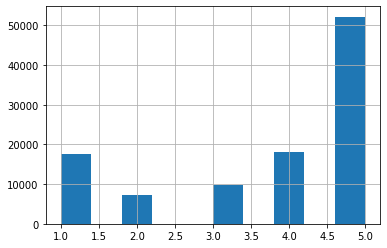

In [5]:
df['star_rating'].hist()

In [6]:
df = df[['star_rating','review_body']]

In [7]:
#missing values dropping
df.dropna(subset=['star_rating', 'review_body'], inplace=True)

In [8]:
df.head()

star_rating                                        review_body
0          5.0  As advertised. Everything works perfectly, I'm...
1          5.0                                         it's great
2          5.0  These work great and fit my life proof case fo...
3          4.0  Work very well but couldn't get used to not he...
4          2.0  Be careful with these products, I have bought ...

In [9]:
def review_label(df):
    df['review_label'] = df['star_rating'].apply(lambda x: 1 if x > 3 else 0)
    return df

# Call the function with your DataFrame 'df'
df = review_label(df)


In [10]:
df.head()

star_rating                                        review_body  \
0          5.0  As advertised. Everything works perfectly, I'm...   
1          5.0                                         it's great   
2          5.0  These work great and fit my life proof case fo...   
3          4.0  Work very well but couldn't get used to not he...   
4          2.0  Be careful with these products, I have bought ...   

   review_label  
0             1  
1             1  
2             1  
3             1  
4             0

In [11]:
df = df.drop('star_rating',axis = 1)

In [12]:
df = df[:20000]

In [13]:
df.head()

review_body  review_label
0  As advertised. Everything works perfectly, I'm...             1
1                                         it's great             1
2  These work great and fit my life proof case fo...             1
3  Work very well but couldn't get used to not he...             1
4  Be careful with these products, I have bought ...             0

In [14]:
df.shape

(20000, 2)

#text preprocessing

In [15]:
from nltk import word_tokenize
from nltk.corpus import stopwords
import re
stopwords = stopwords.words('english')

In [16]:
corpus=[]
l = len(df)
print(l)
for i in range(l):
  review = re.sub('[^a-zA-Z]', ' ', df['review_body'][i])
  review = review.lower()
  review = review.split()
  review = [word for word in review if not word in set(stopwords)]
  review = ' '.join(review)
  corpus.append(review)

20000


In [102]:
corpus

['advertised everything works perfectly happy camera matter fact going buy another one nd car',
 'great',
 'work great fit life proof case iphone',
 'work well get used hearing anything ear v plugged',
 'careful products bought several cameras image pretty decent battery hold charge',
 'appears good still waiting items radio batteries charger go stars',
 'first one arrived brick work charge useless exchanged new one works advertised',
 'worked great vacation',
 'good item provide sound like',
 'love recorder bought obviously tape cassette way play br spent amazing afternoon listening mom passed away tell minute christmas story nicholas two daughters many moons ago wonderful afternoon laughter tears br thank providing time spend afternoon mom',
 'great sound great battery beach work park anywhere battery lasts',
 'want continuous tone piezo e beeper one would get maybe stars possibly dock one star bit quiet rated sound level however wanted thing described listing e buzzer example someth

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

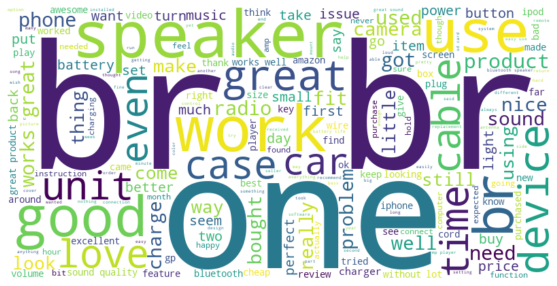

In [21]:
# Join the elements of 'corpus' into a single string
text = ' '.join(corpus)

# Initialize a WordCloud object
cloud = WordCloud()


# Generate the Word Cloud from your text data
wordcloud = cloud.generate(text)

# Configure the appearance of the Word Cloud (optional)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the Word Cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [103]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1420)

In [104]:
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, -1].values

In [105]:
# Saving BoW dictionary to later use in prediction
import pickle
bow_path = 'c1_BoW_Sentiment_Model.pkl'
pickle.dump(cv, open(bow_path, "wb"))

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [112]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed
classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [113]:
# Exporting NB Classifier to later use in prediction
import joblib
joblib.dump(classifier, 'c2_Classifier_Sentiment_Model') 

['c2_Classifier_Sentiment_Model']

In [114]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[ 645  635]
 [ 200 2520]]


0.79125